In [1]:
# Importing all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
sns.set_style('whitegrid')

In [3]:
# Reading dataset

data = pd.read_csv('datasets_insurance.csv')

#### Columns

• age: age of primary beneficiary

• sex: insurance contractor gender, female, male

• bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
       objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

• children: Number of children covered by health insurance / Number of dependents

• smoker: Smoking

• region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

• charges: Individual medical costs billed by health insurance

In [4]:
# Reading first 5 rows of dataset

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Check shape of dataset

print(data.shape)

print('There are {} rows and {} columns in the dataset.'.format(data.shape[0], data.shape[1]))

(1338, 7)
There are 1338 rows and 7 columns in the dataset.


In [6]:
# Summary of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### There are 4 numerical features & 3 categorical features.

In [7]:
# Descriptive statstics of numerical data

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Observation:

The 75% of data has age less than 51 years & the maximum charges are 63770.42

In [8]:
# Check for null values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## EDA (Exploratory Data Analysis)

### 1. Univariate Analysis

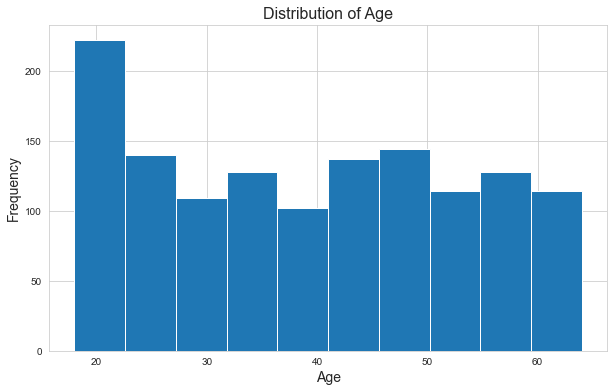

In [9]:
plt.figure(figsize = (10, 6))
plt.hist(data['age'], bins = 10)
plt.title('Distribution of Age', size = 16)
plt.xlabel('Age', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

### The distribution of the 'Age' feature is not normally distributed. The count of people whose age is 20 years is higher than other age.

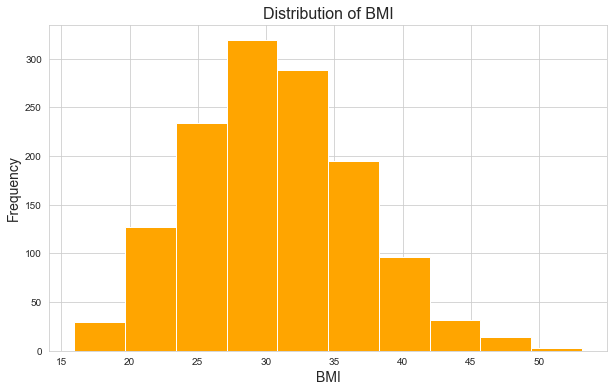

In [10]:
plt.figure(figsize = (10, 6))
plt.hist(data['bmi'], bins = 10, color = 'orange')
plt.title('Distribution of BMI', size = 16)
plt.xlabel('BMI', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

### The distribution of the 'BMI' feature is normally distributed. Most people have a BMI in the range of 24 - 35. 

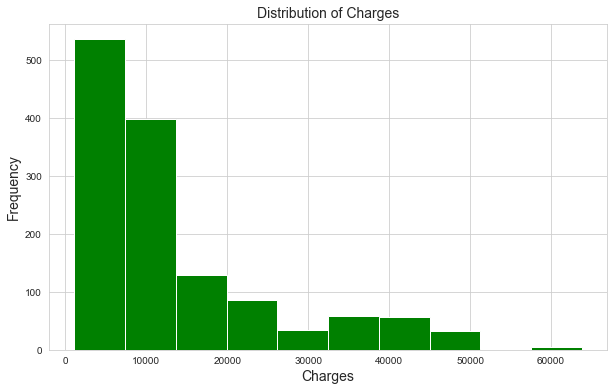

In [11]:
plt.figure(figsize = (10, 6))
plt.hist(data['charges'], bins = 10, color = 'green')
plt.title('Distribution of Charges', size = 14)
plt.xlabel('Charges', size = 14)
plt.ylabel('Frequency', size = 14)
plt.show()

### The distribution of the 'Charges' feature is positively skewed. The count is high when the charges are in the range 1121 - 15000.

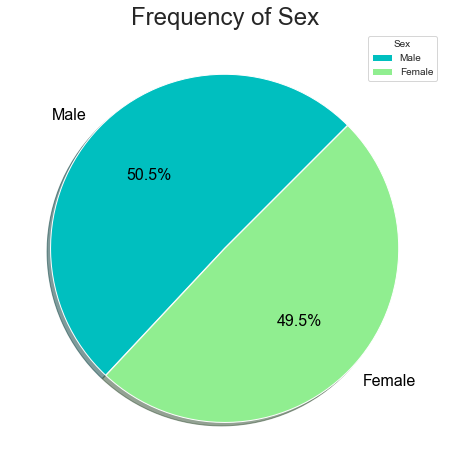

,male,female
sex,50.523169,49.476831


In [12]:
count_sex = data['sex'].value_counts()/data['sex'].value_counts().sum()*100

plt.figure(figsize = (8, 8))
plt.pie(count_sex, labels = ['Male', 'Female'],explode = [0.001, 0.001], shadow = True, textprops = dict(color = 'black', size = 16), autopct='%1.1f%%', colors = ['c', 'lightgreen'], startangle = 45)
plt.title('Frequency of Sex', size = 24)
plt.legend(title = 'Sex')
plt.show()

count_sex.to_frame().T

### Out of 1338 people, 50.52 % are 'Male' & 49.48 % are 'Female'. 

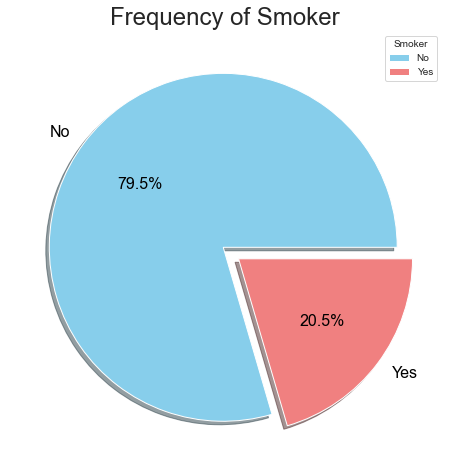

,no,yes
smoker,79.521674,20.478326


In [13]:
count_smoker = data['smoker'].value_counts()/data['smoker'].value_counts().sum()*100

plt.figure(figsize = (8, 8))
plt.pie(count_smoker, labels = ['No', 'Yes'],explode = [0.01, 0.1], textprops = dict(color = 'black', size = 16), shadow = True, autopct = '%1.1f%%', colors =  ['skyblue','lightcoral']) 
plt.title('Frequency of Smoker',  size = 24)
plt.legend(title = 'Smoker')
plt.show()

count_smoker.to_frame().T

### The count of people who doesn't smoke is higher than those who smoke. Out of 1338 people, 79.52 % are non-smokers while 20.48 % are smokers. 

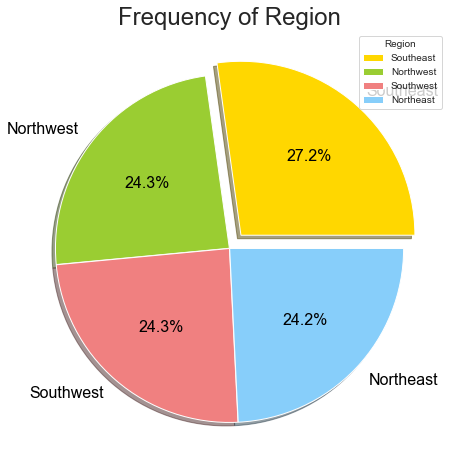

,southeast,southwest,northwest,northeast
region,0.272048,0.2429,0.2429,0.242152


In [14]:
count_region = data['region'].value_counts()/data['region'].value_counts().sum()

plt.figure(figsize = (8, 8))
plt.pie(count_region, labels = ['Southeast', 'Northwest', 'Southwest', 'Northeast'], explode = [0.1, 0.001, 0.001, 0.001], autopct = '%1.1f%%', shadow = True, colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'], textprops = dict(color = 'Black', size = 16), normalize = True)
plt.title('Frequency of Region',  size = 24)
plt.legend(title = 'Region')
plt.show()

count_region.to_frame().T

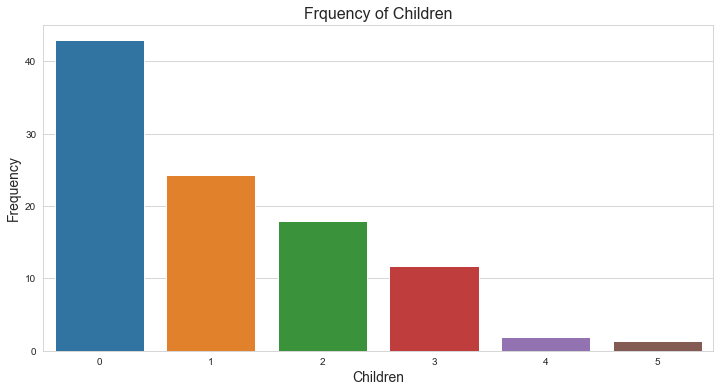

,0,1,2,3,4,5
children,42.899851,24.215247,17.93722,11.733931,1.86846,1.345291


In [15]:
count_child = data['children'].value_counts()/data['children'].value_counts().sum()*100

plt.figure(figsize = (12, 6))
sns.barplot(y = count_child.values, x = count_child.keys(), orient = 'v')
plt.xlabel('Children', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Frquency of Children', size = 16)
plt.show()

count_child.to_frame().T

### 2. Bivariate Analysis

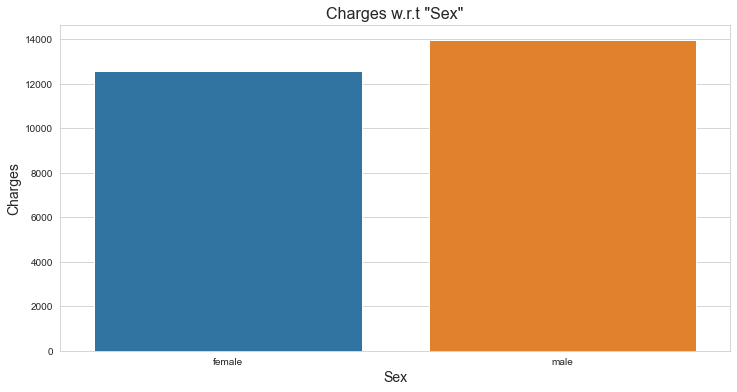

sex,female,male
charges,12569.578844,13956.751178


In [16]:
plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = 'sex', y = 'charges', ci = None)
plt.xlabel('Sex', size = 14)
plt.ylabel('Charges', size = 14)
plt.title('Charges w.r.t "Sex"', size = 16)
plt.show()

data.groupby('sex')['charges'].mean().to_frame().T

### The charges for 'Male' is slightly high than 'Female'. But there is no such insight that medical charges are high for a particular 'Gender'. 

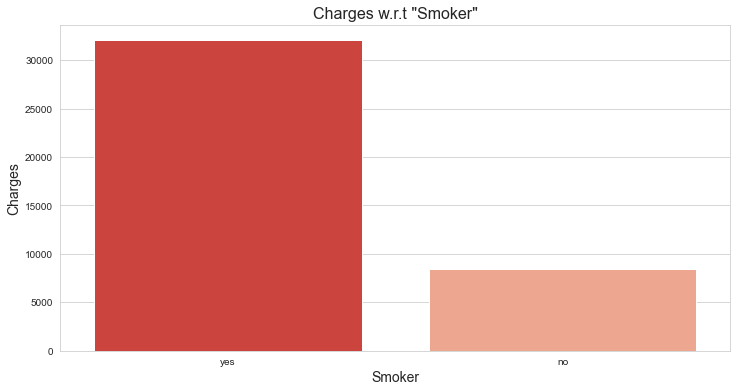

smoker,no,yes
charges,8434.268298,32050.231832


In [17]:
plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = 'smoker', y = 'charges', ci = None, palette = 'Reds_r')
plt.xlabel('Smoker', size = 14)
plt.ylabel('Charges', size = 14)
plt.title('Charges w.r.t "Smoker"', size = 16)
plt.show()

data.groupby('smoker')['charges'].mean().to_frame().T

### The average charge is higher for 'smokers' as compared to 'non-smokers'. We know that a person who smokes has higher medical insurance costs.

### The average price for 'smoker' is 32050.23 & for 'non-smoker' its 8434.26

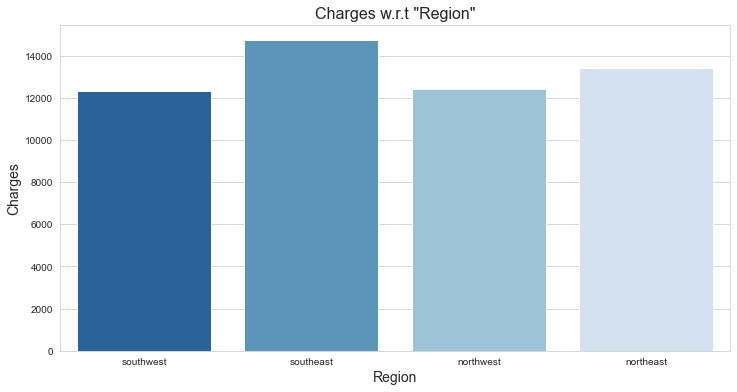

region,northeast,northwest,southeast,southwest
charges,13406.384516,12417.575374,14735.411438,12346.937377


In [18]:
plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = 'region', y = 'charges', ci = None, palette = 'Blues_r')
plt.xlabel('Region', size = 14)
plt.ylabel('Charges', size = 14)
plt.title('Charges w.r.t "Region"', size = 16)
plt.show()

data.groupby('region')['charges'].mean().to_frame().T

### The average charge for the 'southeast' region is higher. The 'northeast' & 'southeast region has high medical charges as compared to northwest' & 'southwest'.

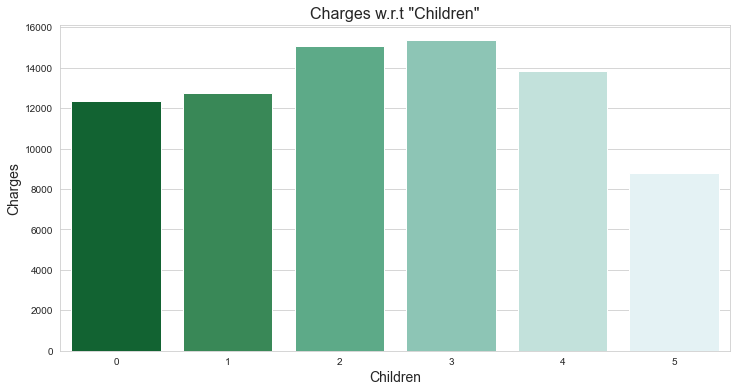

children,0,1,2,3,4,5
charges,12365.975602,12731.171832,15073.563734,15355.318367,13850.656311,8786.035247


In [19]:
plt.figure(figsize = (12, 6))
sns.barplot(data = data, x = 'children', y = 'charges', ci = None, palette = 'BuGn_r')
plt.xlabel('Children', size = 14)
plt.ylabel('Charges', size = 14)
plt.title('Charges w.r.t "Children"', size = 16)
plt.show()

data.groupby('children')['charges'].mean().to_frame().T

### The average charge is high for people who have 2  & 3 children. Around 15073.56 for 2 children & 15355.31 for 3 children.

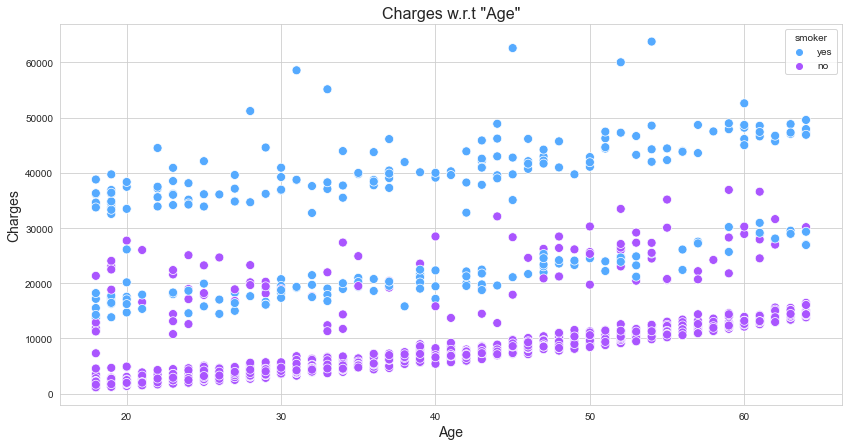

In [20]:
plt.figure(figsize = (14, 7))
sns.scatterplot(data = data, x = 'age', y = 'charges', hue = 'smoker',ci = None, palette = 'cool', s = 80)
plt.xlabel('Age', size = 14)
plt.ylabel('Charges', size = 14)
plt.title('Charges w.r.t "Age"', size = 16)
plt.show()

#print(data.groupby('age')['charges'].mean().to_frame())

### The graph shows that 'Age' & 'Charges' are positively correlated. As age increases the charge also increases. 
### The charges for smokers are double that of non-smokers.

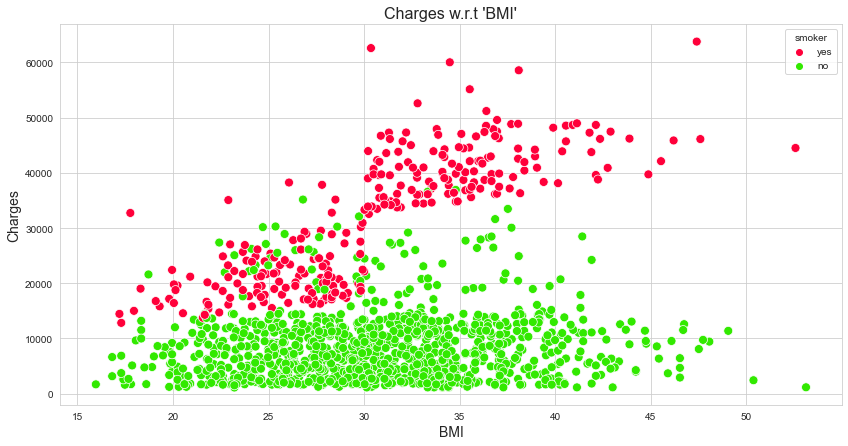

In [21]:
plt.figure(figsize = (14, 7))
sns.scatterplot(data = data, x = 'bmi', y = 'charges', hue = 'smoker', ci = None, palette = 'prism_r', s = 80)
plt.xlabel('BMI', size = 14)
plt.ylabel('Charges', size = 14)
plt.title("Charges w.r.t 'BMI'", size = 16)
plt.show()

#print(data.groupby('bmi')['charges'].mean().to_frame())

### The graph shows that 'BMI' & 'Charges' are positively correlated. As bmi increases the charge also increases.

### The people who smoke & has a BMI of more than 30 are charged more than 30000 whereas people who don't smoke & has a BMI of more than 30 are charged below 30000

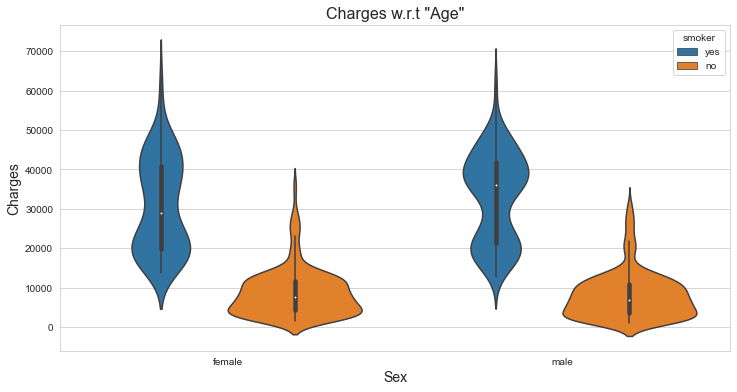

charges
sex    smoker             
female no       7639.41745
       yes     28950.46920
male   no       6985.50695
       yes     36085.21900

In [22]:
plt.figure(figsize = (12, 6))
sns.violinplot(data = data, x = 'sex', y = 'charges', hue = 'smoker', ci = None)
plt.xlabel('Sex', size = 14)
plt.ylabel('Charges', size = 14)
plt.title('Charges w.r.t "Age"', size = 16)
plt.show()

data.groupby(['sex','smoker'])['charges'].median().to_frame()

### The male smoker is charged high as compared to a female smoker.

### The female non-smoker is charged high as compared to a male non-smoker. 

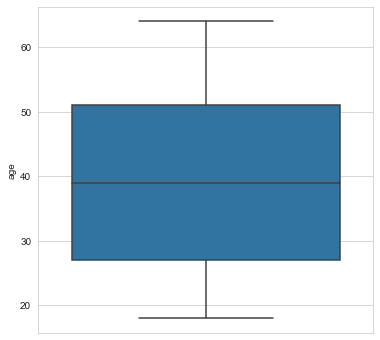

In [23]:
plt.figure(figsize = (6, 6))
sns.boxplot(data = data, y = 'age')
plt.show()

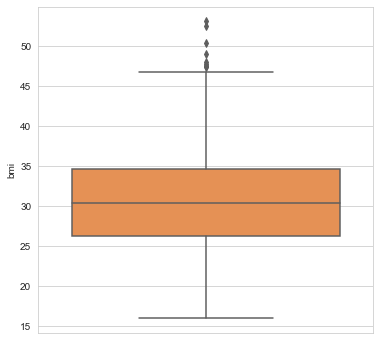

In [24]:
plt.figure(figsize = (6, 6))
sns.boxplot(data = data, y = 'bmi', palette = 'Oranges_r')
plt.show()

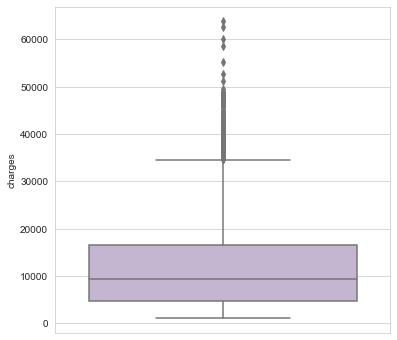

In [25]:
plt.figure(figsize = (6, 6))
sns.boxplot(data = data, y = 'charges', palette = 'tab20_r')
plt.show()

## Data Preprocessing

In [26]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
data = pd.get_dummies(data, drop_first = True)

In [28]:
data.head(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


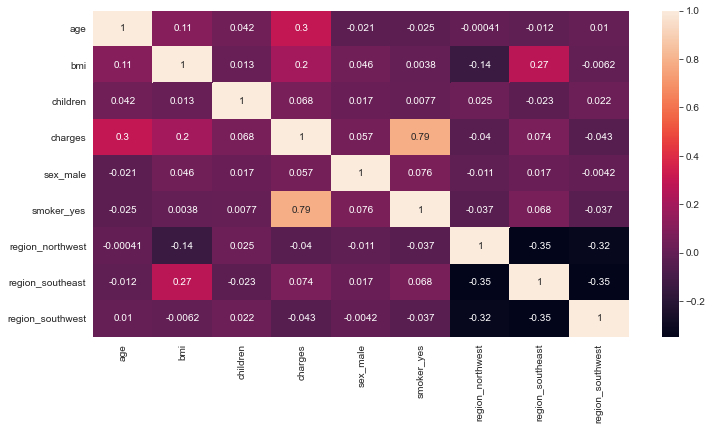

In [29]:
plt.figure(figsize = (12, 6))
sns.heatmap(data.corr(), annot = True)
plt.show()

## Model  Building

In [30]:
X = data.loc[:, data.columns != 'charges']
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

### Linear Regression

In [31]:
reg = LinearRegression()

reg.fit(X_train, y_train)

reg_pred = reg.predict(X_test) 

In [32]:
print('R2 Score:', r2_score(y_test, reg_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, reg_pred)))

R2 Score: 0.7499919893222636
RMSE: 6142.678658652626


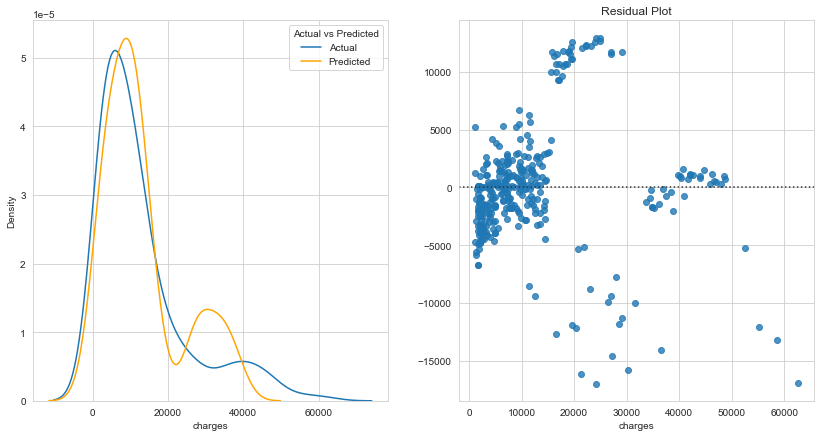

In [33]:
fig , ax = plt.subplots(1,2, figsize = (14,7))

sns.kdeplot(ax = ax[0], x = y_test)
sns.kdeplot(ax = ax[0], x = reg_pred, color = 'orange')
ax[0].legend(title = 'Actual vs Predicted', labels = ['Actual', 'Predicted'], loc = 'upper right')

sns.residplot(ax = ax[1], x = y_test, y = reg_pred)
ax[1].set_title('Residual Plot')

plt.show()